## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [2]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [3]:
len(data.index)

45222

In [4]:
data.loc[data['income'] == '<=50K']

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
12,23,Private,Bachelors,13.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
13,32,Private,Assoc-acdm,12.0,Never-married,Sales,Not-in-family,Black,Male,0.0,0.0,50.0,United-States,<=50K
14,34,Private,7th-8th,4.0,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0.0,0.0,45.0,Mexico,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [5]:
# TODO: Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data.loc[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data.loc[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100*n_greater_50k/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

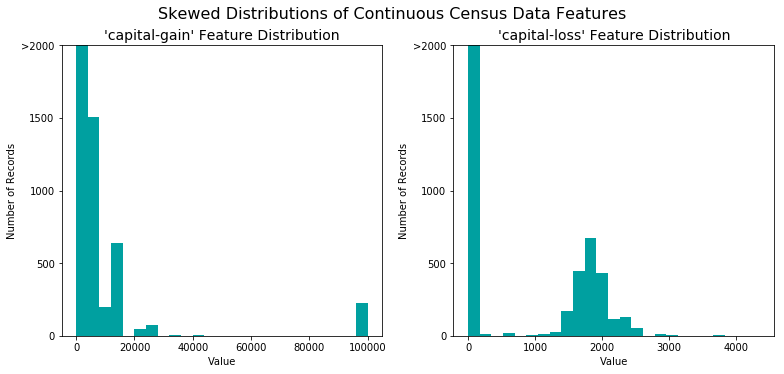

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

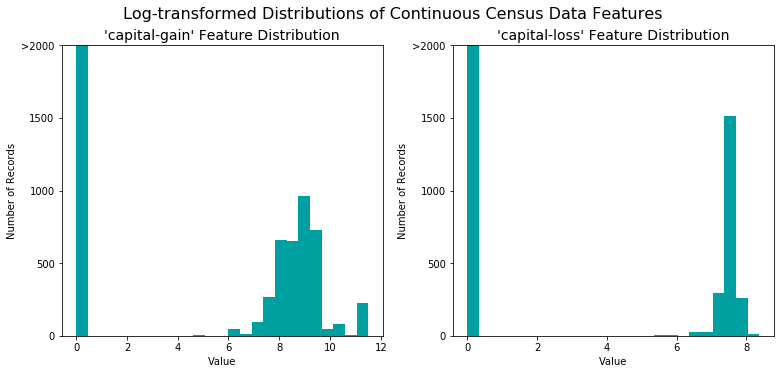

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [9]:
pd.get_dummies(features_log_minmax_transform)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.000000,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.000000,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.273973,0.866667,0.000000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.438356,0.266667,0.000000,0.000000,0.153061,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.479452,0.533333,0.000000,0.000000,0.448980,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,0.191781,0.866667,0.829751,0.000000,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.342466,0.800000,0.742849,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
pd.Categorical(income_raw)

[<=50K, <=50K, <=50K, <=50K, <=50K, ..., <=50K, <=50K, <=50K, <=50K, >50K]
Length: 45222
Categories (2, object): [<=50K, >50K]

In [11]:
pd.Categorical(income_raw).codes

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [12]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = pd.Categorical(income_raw).codes

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


*Note: this Workspace is running on `sklearn` v0.19. If you use the newer version (>="0.20"), the `sklearn.cross_validation` has been replaced with `sklearn.model_selection`.*

----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [14]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = len(income) - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + np.square(0.5)) * precision * recall / ((np.square(0.5) * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

I have selected a Logistic regression classifier as well as two ensemble classifiers (AdaBoost and GradientBoosting). 

1. **Logistic Regression**
  * *Describe one real-world application in industry where the model can be applied.*
    
    The first models that booking.com used to predict likely user behavior were Logistic Regression models.[<sup id="fn1-back">1</sup>](#fn1) One of the application cases e.g. was to predict whether a user will change a journey date or not. Generally speaking, Logistic Regression models are  often applied to binary classification problems.[<sup id="fn2-back">2</sup>](#fn2)
    
  * *What are the strengths of the model; when does it perform well?*
  
      * Logistic Regression is the go-to method for binary classification problems.[<sup id="fn2-back">2</sup>](#fn2)
      * It is simple.[<sup id="fn6-back">6</sup>](#fn6)
      * Tuning of hyperparameters not needed.[<sup id="fn6-back">6</sup>](#fn6)
      * Logistic Regression produces pretty useful predictions even with relatively little training data.[<sup id="fn3-back">3</sup>](#fn3)
      * Logistic Regression won't overfit easily as it's a linear model.[<sup id="fn3-back">3</sup>](#fn3)
  
  * *What are the weaknesses of the model; when does it perform poorly?*
  
      * Logistic Regression assumes a linear relationship between the input variables with the output.[<sup id="fn2-back">2</sup>](#fn2) If this is not given, the model may perform poorly.
      * The model can overfit or generally perform badly if there are multiple highly-correlated inputs.[<sup id="fn2-back">2</sup>](#fn2)
    
  * *What makes this model a good candidate for the problem, given what you know about the data?*
  
      * Our response variable is binary (two classes: "less than 50K" and "above 50K").
      * We do not have a whole lot of data compared to the number of final features.
      
1. **Ensemble Methods: AdaBoost**
  * *Describe one real-world application in industry where the model can be applied.*
    
    An example of a real-world application involving AdaBoost is customer churn prediction, i.e. predicting whether a customer is unlikely to return/remain a customer.[<sup id="fn5-back">5</sup>](#fn5)
    
  * *What are the strengths of the model; when does it perform well?*
  
      * AdaBoost is an Ensemble method and thus generally much more robust against overfitting than, e.g. simple Decision Trees.
      * AdaBoost needs less parameter tweaking than other algorithms, e.g. SVMs.[<sup id="fn4">4</sup>](#fn4-back) 
      * AdaBoost yields feature importance and can be used for feature selection. 
  
  * *What are the weaknesses of the model; when does it perform poorly?*
  
      * AdaBoost learns progressively, so it is important to ensure to work with quality data.[<sup id="fn4">4</sup>](#fn4-back) 
      * AdaBoost is also extremely sensitive to noisy data and outliers.[<sup id="fn4">4</sup>](#fn4-back) 
    
  * *What makes this model a good candidate for the problem, given what you know about the data?*
  
      * We seem to have rather high-quality data without missing values or a lot of obvious outliers.
      * We can assume that not a lot of our features are irrelevant or noisy.
         
1. **Ensemble Methods: GradientBoost**
  * *Describe one real-world application in industry where the model can be applied.*
    
    GradientBoost can be used for any classification problem.[<sup id="fn6-back">6</sup>](#fn6) An example of a real-world application of GradientBoost is Anti-money lanundering in cryptocurrencies[<sup id="fn10-back">10</sup>](#fn10)
    
  * *What are the strengths of the model; when does it perform well?*
  
      * GradientBoost is an Ensemble method and thus generally relatively robust against overfitting.
      * GradientBoost often provides high predictive accuracy.[<sup id="fn8">8</sup>](#fn8-back)  
      * GradientBoost is very flexible: different loss functions or hyper parameters can be used for optimization.[<sup id="fn8">8</sup>](#fn8-back)  
      * GradientBoost handles missing data well.[<sup id="fn8">8</sup>](#fn8-back)  
      * GradientBoost yields feature importance and can be used for feature selection.[<sup id="fn6-back">6</sup>](#fn6) 
      
  * *What are the weaknesses of the model; when does it perform poorly?*
  
      * Models can be computationally expensive and take a long time to train.[<sup id="fn7">7</sup>](#fn7-back)  
      * Downside of the high flexibility is a large grid that needs to be searched in parameter optimization.[<sup id="fn8">8</sup>](#fn8-back). This generally makes the model harder to tune.[<sup id="fn6-back">6</sup>](#fn6)  
      * The models are not easily interpretable.[<sup id="fn9-back">9</sup>](#fn9)  
    
  * *What makes this model a good candidate for the problem, given what you know about the data?*
  
    * The model is generally considered to be performing good regardless of the classification problem and very robust to a large number of features, outliers, missing values, etc.[<sup id="fn6-back">6</sup>](#fn6) Since we do not know a whole lot about our data, it is cetrainly a model worth exploring.


[<sup id="fn1">1</sup>](#fn1-back) https://activewizards.com/blog/5-real-world-examples-of-logistic-regression-application    
    
[<sup id="fn2">2</sup>](#fn2-back) https://machinelearningmastery.com/logistic-regression-for-machine-learning/    
    
[<sup id="fn3">3</sup>](#fn3-back) https://holypython.com/log-reg/logistic-regression-pros-cons/
    
[<sup id="fn4">4</sup>](#fn4-back)  https://blog.paperspace.com/adaboost-optimizer/    
    
[<sup id="fn5">5</sup>](#fn5-back) https://www.cs.rit.edu/~rlaz/PatternRecognition/slides/churn_adaboost.pdf    
    
[<sup id="fn6">6</sup>](#fn6-back) https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6

[<sup id="fn7">7</sup>](#fn7-back) https://discuss.boardinfinity.com/t/gradient-boosting-advantages-and-disadvantages/12577

[<sup id="fn8">8</sup>](#fn8-back) https://blog.paperspace.com/gradient-boosting-for-classification/

[<sup id="fn9">9</sup>](#fn9-back)https://medium.com/gradient-boosting-working-limitations-time/gradient-boosting-working-and-applications-28e8d4ba866d

[<sup id="fn10">10</sup>](#fn10-back)https://link.springer.com/article/10.1007/s42979-021-00558-z

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [15]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegressionCV trained on 361 samples.
LogisticRegressionCV trained on 3617 samples.
LogisticRegressionCV trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


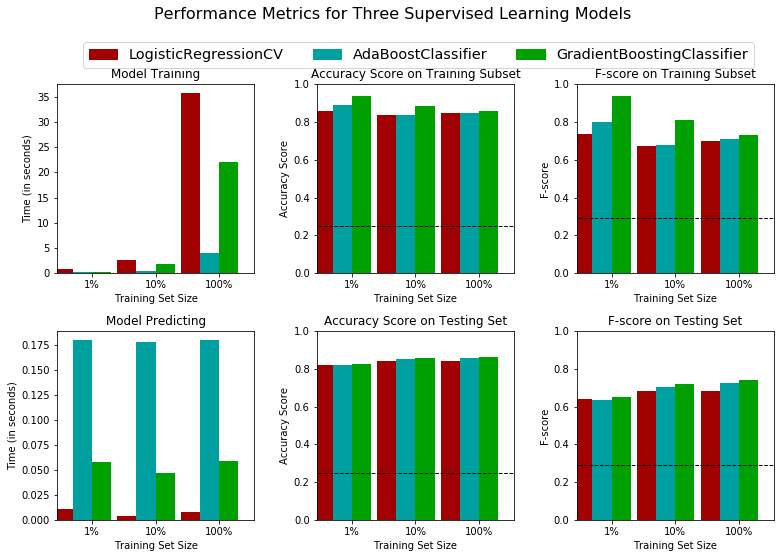

In [16]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the three models 
clf_A = LogisticRegressionCV(random_state = 0) # takes long
clf_B = AdaBoostClassifier(random_state = 0)
clf_C = GradientBoostingClassifier(random_state = 0)
# did some more out of curiosity...
#clf_A = GaussianNB(random_state = 0) # performs badly
#clf_A = SVC(random_state = 0) # takes long, performs badly
#clf_A = KNeighborsClassifier(random_state = 0)  # takes long
#clf_A = DecisionTreeClassifier(random_state = 0)
#clf_A = SGDClassifier(random_state = 0)
#clf_A = RandomForestClassifier(random_state = 0)
#clf_A = RandomForestClassifier(random_state = 0, class_weight="balanced")
#clf_A = BaggingClassifier(random_state = 0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = samples_100//10
samples_1 = samples_10//10

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

Out of the three tested models, the GradientBoostingClassifier performed best in terms of Accuracy and F-score. While the differences in the performance scores are not huge, they are noticable and clearly favor GradientBoost. 

While in terms of training times, AdaBoost is much faster, I would not weigh this factor too high. For the application case, training will be comparatively seldom and performance is very relevant. Granted, hyper-parameter optimization will take much longer than with other algorithms, but even a small increase in performance justifies that imho. In terms of prediction times, GradientBoost outperforms AdaBoost (even though all execution times are very low, so this may not matter at all).

As an all-purpose classification algorithm that is robust against a variety of problems (such as too many features, too large datasets, outliers, missing values, little feature engineering)[<sup id="fn1-back">1</sup>](#fn1), it is a good choice for the data, since it is hard to judge the data quality of some dimensions. Also, adding new datapoints  of unknown quality and re-training should be unproblematic.
    
[<sup id="fn1">1</sup>](#fn1-back)  https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6   
    

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 
GradientBoost is a supervised machine learning algorithm, i.e it can be used to learn the interrelationship of input variables with outcome classes based on labeled training data and predict the outcome class for new data points.

GradientBoost is a so-called ensemble method, meaning that a many smaller models that only perform well on some parts of the data are combined to complement each other and build a strong combined model. 

The key idea of GradientBoost is to iteratively build the ensemble so that each next model minimizes the erros of the previous one[<sup id="fn1-back">1</sup>](#fn1), thus alleviating its shortcomings and boosting the overall prediction quality. Each additional so-called weak learner trains on the remaining errors of the ensemble strong learner.[<sup id="fn2-back">2</sup>](#fn2)

[<sup id="fn1">1</sup>](#fn1-back) https://medium.com/analytics-vidhya/introduction-to-the-gradient-boosting-algorithm-c25c653f826b

[<sup id="fn2">2</sup>](#fn2-back) https://blog.paperspace.com/gradient-boosting-for-classification/

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [17]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state = 0, verbose = 0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {
              #    'loss': ['deviance', 'exponential'], # exponential always seems to perform worse...
                  'learning_rate': [0.1, 0.25],
                  'n_estimators': [100, 500],
                  'min_samples_split': list(range(2,7,4)),
                  'min_samples_leaf': list(range(1,4)),
                  'max_depth': list(range(3,8,2))
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer, n_jobs = -1, verbose = 3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("Best model's parameters:")
print(grid_fit.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.7388704855780884, total=  14.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.4s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.7431841666004293, total=  14.4s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   28.9s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.7481193684384557, total=  14.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.7531476535673407, total=  57.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.7485052599712404, total=  58.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.7642862742023987, total=  30.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_sample

[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 159.6min finished


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8720
Final F-score on the testing data: 0.7548
Best model's parameters:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 500}


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.8630     |   0.8720        |
| F-score        |        0.7395     |   0.7548        |


**Answer: **

The optimized model after performing a GridSearch (3 folds per 72 candidates, totalling 216 fits) is a GradienBoostingClassifier with the parameters `{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 500}`. 

The model's performance is slightly better than that of the unoptimized one. While the increase seems to be rather low at first glance, it is an increase nonetheless and given the application case, the relatively small gain in prediction performance may very well result in a significant real-world financial gain. In that way, optimization can be considered a success, I would say. On the other hand, when looking at the individual scores of the grid search, there seems to be some fluctuation between the three folds of one parameter permutation, which in some cases is as large as the net increase of the scores between the unoptimized and optimized model, so I am wondering how durable the choice of best estimator is based on that. I also experimented with different values for the `random_state` and the changes in importance fluctuated as well, so there may not be any real sustainable increase in performance at all. 

Compared with the naive model, the scores of both the unoptimized as well as the optimized model have greatly increased. Since the dataset is imbalanced (and I would think that probably the distribution in real life is even more so), the naive predictor only was correct in roughly 25% of the time. The optimized model should be able to make meaningful predictions.


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

Since we are trying to predict the income of individuals, I believe the following features would have the most predictive value:

1. Occupation: Income is probably highly correlated with the type of job. Jobs in manangement will earn a person more than, let's say someone in technical support. 

2. Age: As people tend to gain experience with age and achieve seniority when being in a company for a longer time (or for that matter, having worked in a number of different companies), it is only logical that older individuals would generally earn more money.

3. Workclass: The class of work is likely also assciated with the probability of a higher or lower income, especially when looking at edge cases such as "never worked" or "without pay".

4. Education level: On the one hand, generally, the level of education is likely correlated to the income. The rarer an education, the more someone that has the formal qualification can expect to make. On the other hand, there surely must be many people with a financially successful career or even their own business whose success did not depend or is built on formal academic achievement.

5. Country: While the feature is not country of residence, but country of origin, I would expect the majority of people to work in their country of origin, even in a globalized world. Since levels of income hugely differ between different countries, this feature should have some predictive power. However, if it is really just the origin of different people all working in more or less the same economy (let's say the US), the expressiveness of this feature will be much smaller. 






### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

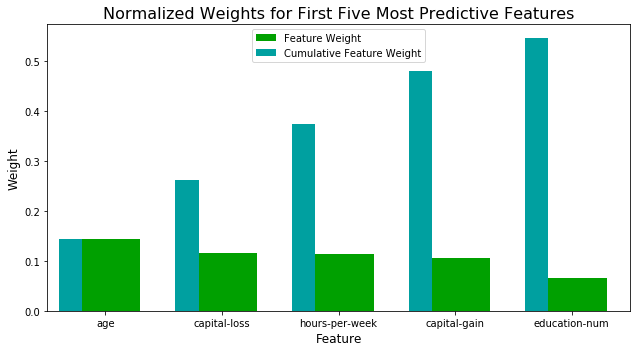

In [21]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(learning_rate = 0.1, 
                                   min_samples_leaf =  2, 
                                   min_samples_split = 6, 
                                   n_estimators = 500,
                                   max_depth = 3,
                                   random_state = 0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
The important features only partially overlap with those I discussed above, actually the only feature in both lists being `age`. I think there are different reasons for that.

(1) I suspect that the relationship between income and age that I argued is accurate. In fact, in the feature ranking by the GradientBoostingClassifier, `age` is actually the most important feature.

(2) In my rating above, I have largely disregarded `capital-loss` and `capital-gain` since I do not fully grasp what the semantics behind these variables are.

(3) My intuition on the feature `hours-per-week` was that people who work a lot of hours often may do so in lower paying jobs. I may have misjudged here, that on the other side of the spectrum, people in high-income jobs also tend to work more hours than average.

(4) It is noteworthy (and maybe even the pivotal point) that the most important features in the automatic rating seem to be _all the continuous numerical features_. Since the categorical variables were split up using the one-hot encoding scheme, this is not that surprising in hindsight - all former categorical variables are after all not a _single_ feature anymore  but a _series of features_ instead. So in the rating of the features by the GradientBoostingClassifier the parts of these split-up features probably have less predictive power by themselves.



### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [19]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
#clf = (clone(best_clf)).fit(X_train_reduced, y_train)
# Changed "best_clf" to "model" from the previous cell, since it has the same parameters without me requiring to run the grid search again
clf = (clone(model)).fit(X_train_reduced, y_train)

# re-create best predictions from above without running grid search again
best_predictions = model.predict(X_test)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8720
F-score on testing data: 0.7548

Final Model trained on reduced data
------
Accuracy on testing data: 0.8426
F-score on testing data: 0.6994


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The final model's F-score and Accuracy are notablicy lower than those when all features are used. 

If training time were a significant factor, I would probably rather choose to use a different model with faster training - such as AdaBoost - than use the reduced data as training set, since that seems to result in an overall higher performance (see above). 

That being said, if it were the case that in our real world application, obtaining the data with the full feature set in the first place was much harder than gathering data with the reduced set of features, the worse performance could be mitigated by the fact that we'd be able to apply the prediction on a much larger set of individuals' data, possibly resulting in a net larger fincancial gain. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [20]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 600398 bytes to finding_donors.html']